<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Chemostat/blob/main/BPL_TEST2_Chemostat_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Chemostat script with PyFMI

The key library PyFMI is installed.

After the installation a small application BPL_TEST2_Chemostat is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!python --version

Python 3.10.11


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!chmod +x Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!bash ./Miniconda3-py310_23.1.0-1-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages/')

--2023-05-31 10:54:52--  https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74403966 (71M) [application/x-sh]
Saving to: ‘Miniconda3-py310_23.1.0-1-Linux-x86_64.sh’

Miniconda3-py310_23 100%[===================>]  70.96M   209MB/s    in 0.3s    

2023-05-31 10:54:53 (209 MB/s) - ‘Miniconda3-py310_23.1.0-1-Linux-x86_64.sh’ saved [74403966/74403966]

PREFIX=/usr/local
Unpacking payload ...
                                                                                         
Installing base environment...





Preparing transaction: - \ | / - done
Executing transaction: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
installation finished.


In [ ]:
!conda update -n base -c defaults conda --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py39h06a4308_0         426 KB
    conda-23.3.0               |   py39h06a4308_0         962 KB
    cryptography-39.0.1        |   py39h9ce1e76_0         1.4 MB
    openssl-1.1.1t             |       h7f8727e_0         3.7 MB
    packaging-23.0             |   py39h06a4308_0          68 KB
    pyopenssl-23.0.0           |   py39h06a4308_0          96 KB
    requests-2.28.1            |   py39h06a4308_1          99 KB
    sqlite-3.41.1              |       h5eee18b_0         1.2 MB
    tqdm-4.65.0                |   py39hb070fc8_0         131 KB
    zstandard-0.19.0           |   py39h5eee18b_0         474 KB


In [ ]:
!conda --version
!python --version

conda 23.1.0
Python 3.10.9


In [ ]:
!conda install -c conda-forge pyfmi --yes # Install the key package

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pyfmi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----

## Now specific installation run a simulation and notebook for that

Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Chemostat_linux_om_me.fmu
* Setup-file - BPL_TEST2_Chemostat_explore.py

In [ ]:
# Filter out DepracationWarnings for 'np.float as alias' is needed - wish I could make filter more narrow
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Chemostat

Cloning into 'BPL_TEST2_Chemostat'...


In [ ]:
%cd BPL_TEST2_Chemostat

/content/BPL_TEST2_Chemostat/BPL_TEST2_Chemostat/BPL_TEST2_Chemostat


In [ ]:
run -i BPL_TEST2_Chemostat_explore.py

Linux - run FMU pre-comiled OpenModelica 1.21.0

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


<Figure size 984.252x787.402 with 0 Axes>

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [ ]:
process_diagram()

In [ ]:
describe('culture')

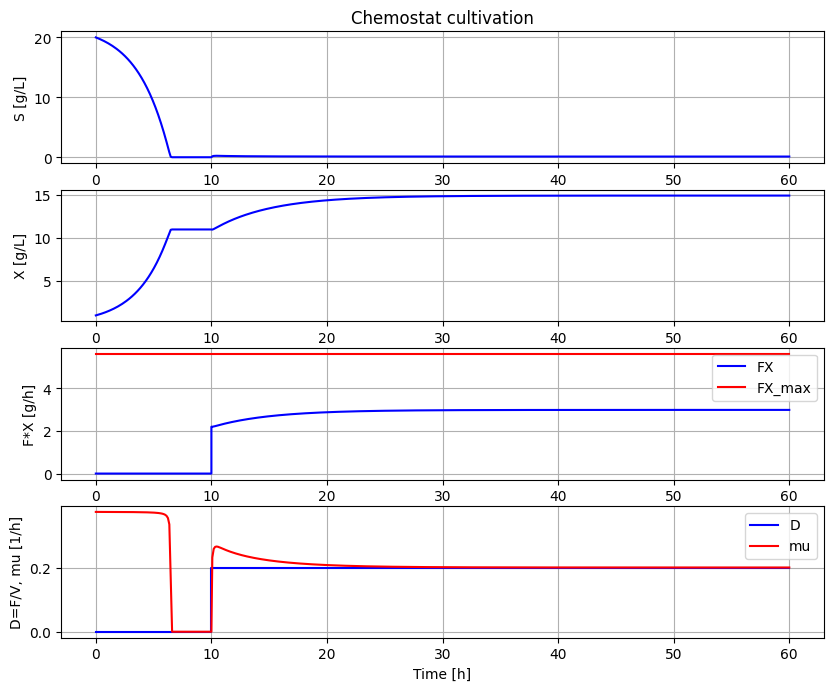

In [ ]:
newplot()
par(Y=0.50, qSmax=0.75,  Ks=0.1)         # Culture parameters
init(V_0=1.0, VX_0=1.0, VS_0=20)         # Bioreactor startup
par(S_in=30, t0=0, F0=0, t1=10, F1=0.2)  # Substrate feeding
simu(60)

In [ ]:
# The maximal biomass productivity FX_max [g/h] marked red in the diagram above
# can be calculated for CSTR from the FMU and is
cstrProdMax(model)

5.625

In [ ]:
describe('cstrProdMax')

Calculate from the model maximal chemostat productivity FX_max : 5.625 [ g/h ]


In [ ]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'D', 'dosagescheme', 'feedtank', 'harvesttank']


In [ ]:
system_info()


System information
 -OS: Linux
 -Python: 3.10.11
 -Scipy: not installed in the notebook
 -PyFMI: 2.10.3
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0
 -FMI: 2.0
 -Type: FMUModelME2
 -Name: BPL_TEST2.Chemostat
 -Generated: 2023-04-20T12:24:50Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.1.1
 -Interaction: FMU-explore version 0.9.8
